# Testing the Peak Detection Algorithm
## Quantification of the amount of well detected peaks
### CheckList
- Genereate clean synthetic ECG signals
- Calculate the amount of peaks present
- Add noises with different amounts
- Check the peaks detected with he agorithm and compare them to the total of them

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal
import math
import statistics
import neurokit2 as nk
from scipy.signal import butter, filtfilt, iirnotch, savgol_filter
import scipy.signal
import peakutils.peak
import seaborn as sns
import padasip as pa
import random

from misc.noisesynthetic import *
from misc.peakdetection import *
from misc.peakdetection_v2 import *
from misc.peakdetectiongood import filteringdet

In [2]:
# We generate a dataframe containing different synthetic clean signals with different HRs.
pd_signals = pd.DataFrame()

hrs = np.arange(50,130,10) # array containing the different HRs

for hr in hrs:
    ecg = nk.ecg_simulate(duration=50, sampling_rate=1000, heart_rate=hr) # We generate a synthetic ECG signal for a given HR
    normalised = (ecg - np.min(ecg)) / np.max(ecg-np.min(ecg)) # We normalise the signal.
    pd_signals['HR'+str(hr)] = ecg # We store it into the dataframe.

In [4]:
# We find the peaks of the cleaned singnals and store them into a dataframe: a listcheck panda, our true arrays.
true_peaks = {value+':TruePeaks':[] for value in pd_signals} # Dicts where we will save the 'x_values for the true peaks'
true_peaks_nk = {value+':TruePeaks':[] for value in pd_signals}
num_peaks = []
num_peaks_nk = []
for column in pd_signals: # For each of the signals stored previously.
    peaks_nk = nk.ecg_findpeaks(pd_signals[column], sampling_rate=1000, method="elgendi2010", show=False) # We find the peaks with the 'nk' method
    peaks = filteringdet(pd_signals[column],1000) # We find the peaks with our algorithm.
    
    num_peaks.append(len(peaks['x_values'])) # We save the total number of them.
    num_peaks_nk.append(len(peaks_nk['ECG_R_Peaks'])) # We save the total number of them.
        
    true_peaks[column+':TruePeaks'] += [value for value in peaks['x_values'].tolist()] # We add the list of peaks into the dictionary.
    true_peaks_nk[column+':TruePeaks'] += [value for value in peaks_nk['ECG_R_Peaks'].tolist()]

true_peaks = dict([ (k,pd.Series(v)) for k,v in true_peaks.items() ]) # We convert the dictionary into a dataframe
true_peaks_nk = dict([ (k,pd.Series(v)) for k,v in true_peaks.items() ])
pd_true_peaks = pd.DataFrame(true_peaks)
pd_true_peaks_nk = pd.DataFrame(true_peaks_nk)


#### Artifacts
- Power Interference
- Baseline Wonder
- EMG noise
- White noise

In [33]:
# We generate several dataframes adding noise to the signals with different amounts 
pd_noisy_signals = pd.DataFrame()

for column in pd_signals: # Here we add different amounts of artifacts to the signals.
    power = powerinterference(pd_signals[column], 1000, amplitude=0.08) # Power noise
    bw = gen_bw_noise(power, 0.000008, amplitude=1.5) # Baseline wander
    emg = emgnoise(bw,std=0.02) # EMG noise
    wn = gen_white_noise(emg,stan=0.02) # White Noise
    pd_noisy_signals[column] = wn

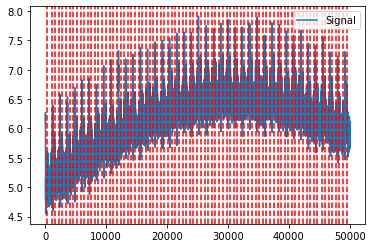

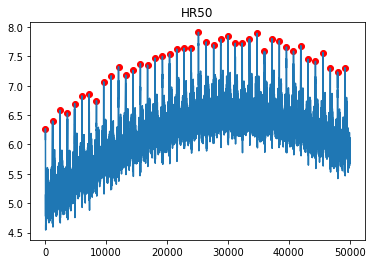

/var/folders/79/9_sl0_px0m153y_7w874f1qw0000gn/T/ipykernel_23752/144452515.py:26: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  difference_array = np.subtract(peaks_nk['ECG_R_Peaks'], pd_true_peaks[column+':TruePeaks'][..., np.newaxis]) # We calculate the RMSE for the array containing 'nk' peaks


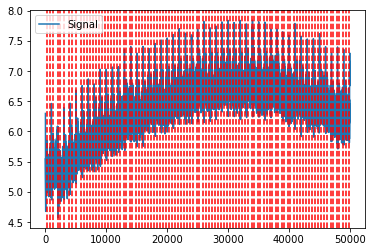

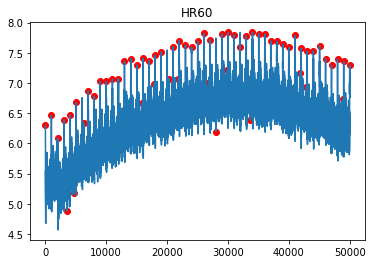

/var/folders/79/9_sl0_px0m153y_7w874f1qw0000gn/T/ipykernel_23752/144452515.py:26: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  difference_array = np.subtract(peaks_nk['ECG_R_Peaks'], pd_true_peaks[column+':TruePeaks'][..., np.newaxis]) # We calculate the RMSE for the array containing 'nk' peaks


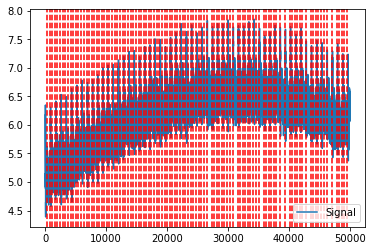

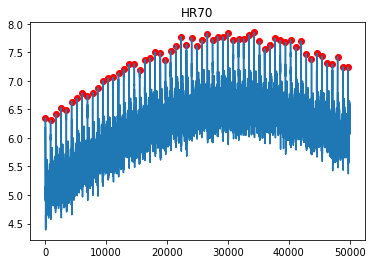

/var/folders/79/9_sl0_px0m153y_7w874f1qw0000gn/T/ipykernel_23752/144452515.py:26: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  difference_array = np.subtract(peaks_nk['ECG_R_Peaks'], pd_true_peaks[column+':TruePeaks'][..., np.newaxis]) # We calculate the RMSE for the array containing 'nk' peaks


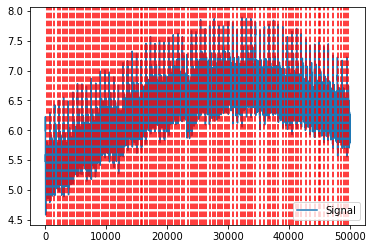

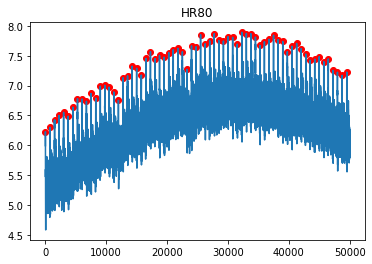

/var/folders/79/9_sl0_px0m153y_7w874f1qw0000gn/T/ipykernel_23752/144452515.py:26: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  difference_array = np.subtract(peaks_nk['ECG_R_Peaks'], pd_true_peaks[column+':TruePeaks'][..., np.newaxis]) # We calculate the RMSE for the array containing 'nk' peaks


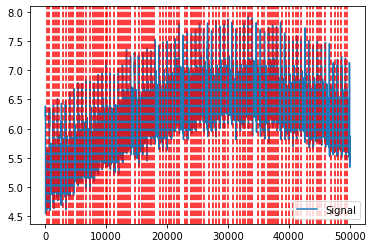

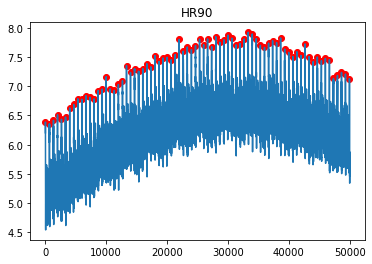

/var/folders/79/9_sl0_px0m153y_7w874f1qw0000gn/T/ipykernel_23752/144452515.py:26: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  difference_array = np.subtract(peaks_nk['ECG_R_Peaks'], pd_true_peaks[column+':TruePeaks'][..., np.newaxis]) # We calculate the RMSE for the array containing 'nk' peaks


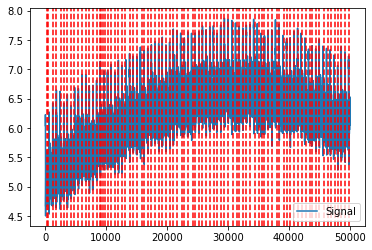

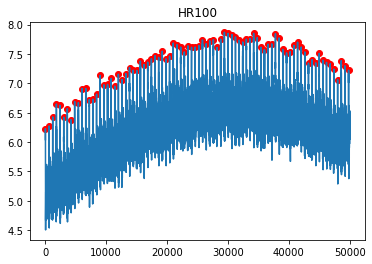

/var/folders/79/9_sl0_px0m153y_7w874f1qw0000gn/T/ipykernel_23752/144452515.py:26: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  difference_array = np.subtract(peaks_nk['ECG_R_Peaks'], pd_true_peaks[column+':TruePeaks'][..., np.newaxis]) # We calculate the RMSE for the array containing 'nk' peaks


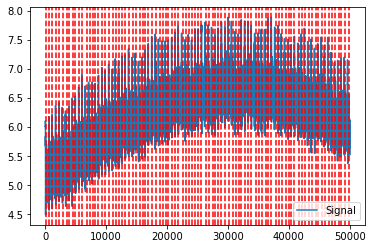

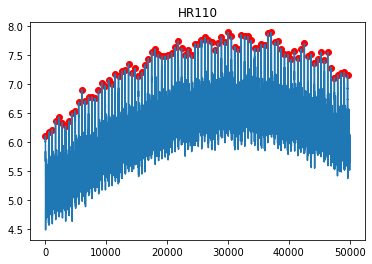

/var/folders/79/9_sl0_px0m153y_7w874f1qw0000gn/T/ipykernel_23752/144452515.py:26: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  difference_array = np.subtract(peaks_nk['ECG_R_Peaks'], pd_true_peaks[column+':TruePeaks'][..., np.newaxis]) # We calculate the RMSE for the array containing 'nk' peaks


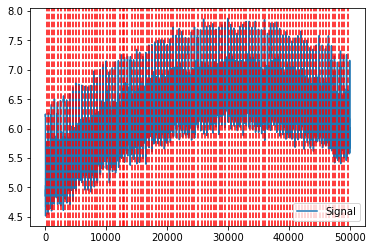

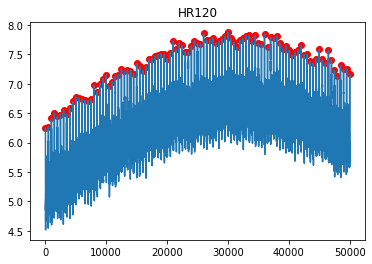

[42, 51, 59, 67, 76, 84, 92, 101]
[42, 4, 59, 67, 76, 84, 92, 101]
[0, 0, 0, 0, 0, 10, 42, 22]


MSE
[3.680709041423819, 5029.784178506364, 3.0642830333496573, 2.975020381217029, 3.4047180886466792, 2.97008898375597, 3.2952535034764643, 2.9634740116663387]
[nan, nan, nan, nan, nan, nan, nan, 20525.56357011885]


/var/folders/79/9_sl0_px0m153y_7w874f1qw0000gn/T/ipykernel_23752/144452515.py:26: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  difference_array = np.subtract(peaks_nk['ECG_R_Peaks'], pd_true_peaks[column+':TruePeaks'][..., np.newaxis]) # We calculate the RMSE for the array containing 'nk' peaks


In [34]:
# We detect the peaks using our algorithm and then we compare.
detected_indexes = [] # lists where we will store the peaks
detected_indexes_nk = []
diff_al = [] # The error between the predicted and the real peak will be stored here.
diff_nk = []

for column in pd_noisy_signals:
    peaks = filteringdet(pd_noisy_signals[column],1000) # for each column in the dataframe we calculate the peaks.
    peaks_nk = nk.ecg_findpeaks(pd_noisy_signals[column], sampling_rate=1000, method="elgendi2010", show=False)
    plot = nk.events_plot(peaks_nk['ECG_R_Peaks'], pd_noisy_signals[column]) # We plot the peaks detected using the nk library
    plt.show()
    true_index = [] # We initialise two lists where the indexes detected will be stored
    true_index_nk = []
    
    signal, = plt.plot(pd_noisy_signals[column]) # We plot the peaks detected using our algorithm.
    plt.title(column)
    plt.scatter(peaks['x_values'],peaks['y_values'],color='r')
    plt.show()
    
    difference_array = np.subtract(peaks['x_values'], pd_true_peaks[column+':TruePeaks']) # We calculate the RMSE for the array containing our peaks
    squared_array = np.square(difference_array)
    mse = squared_array.mean()
    sq = np.sqrt(mse)
    diff_al.append(sq)
    
    difference_array = np.subtract(peaks_nk['ECG_R_Peaks'], pd_true_peaks[column+':TruePeaks'][..., np.newaxis]) # We calculate the RMSE for the array containing 'nk' peaks
    squared_array = np.square(difference_array)
    mse = squared_array.mean()
    sq = np.sqrt(mse)
    diff_nk.append(sq)
    
    for index,value in enumerate(peaks['x_values']): # We compare if the peaks are at the same position, we add a range as the peak detection algorithm adds a shift to the right.
        if float('-inf') < float(pd_true_peaks[column+':TruePeaks'][index]) < float('inf'): # This line is a condition to avoid comparing NaN values, as the dataframe had colmns of different shapes and the differences were evened with NaN.
            if int(pd_true_peaks[column+':TruePeaks'][index])-11 <= value <=int(pd_true_peaks[column+':TruePeaks'][index])+11: # Here we check if the peaks are equal. I have added a range because the algorithm produces a tiny shift.
                true_index.append(index) # We append the index when the condition is True.
    detected_indexes.append(len(true_index))
    for index,value in enumerate(peaks_nk['ECG_R_Peaks'][0:100].tolist()): # We compare as well, but with the 'find_peaks' function from nk.
        if float('-inf') < float(pd_true_peaks_nk[column+':TruePeaks'][index]) < float('inf'): # This line is a condition to avoid comparing NaN values, as the dataframe had colmns of different shapes and the differences were evened with NaN.
            if int(pd_true_peaks_nk[column+':TruePeaks'][index])-11 <= value <=int(pd_true_peaks_nk[column+':TruePeaks'][index])+11: # Here we check if the peaks are equal. I have added a range because the algorithm produces a tiny shift.
                true_index_nk.append(index) # We append the index when the condition is True.
    detected_indexes_nk.append(len(true_index_nk))
        
print(num_peaks)
print(detected_indexes)
print(detected_indexes_nk)

print("\n")
print("MSE")
print(diff_al)
print(diff_nk)    
    